In [17]:
import SimpleITK as sitk
import numpy as np
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''
def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)
    
    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

In [20]:
ct_scans, origin, spacing =load_itk('MyOutputFile.mhd')

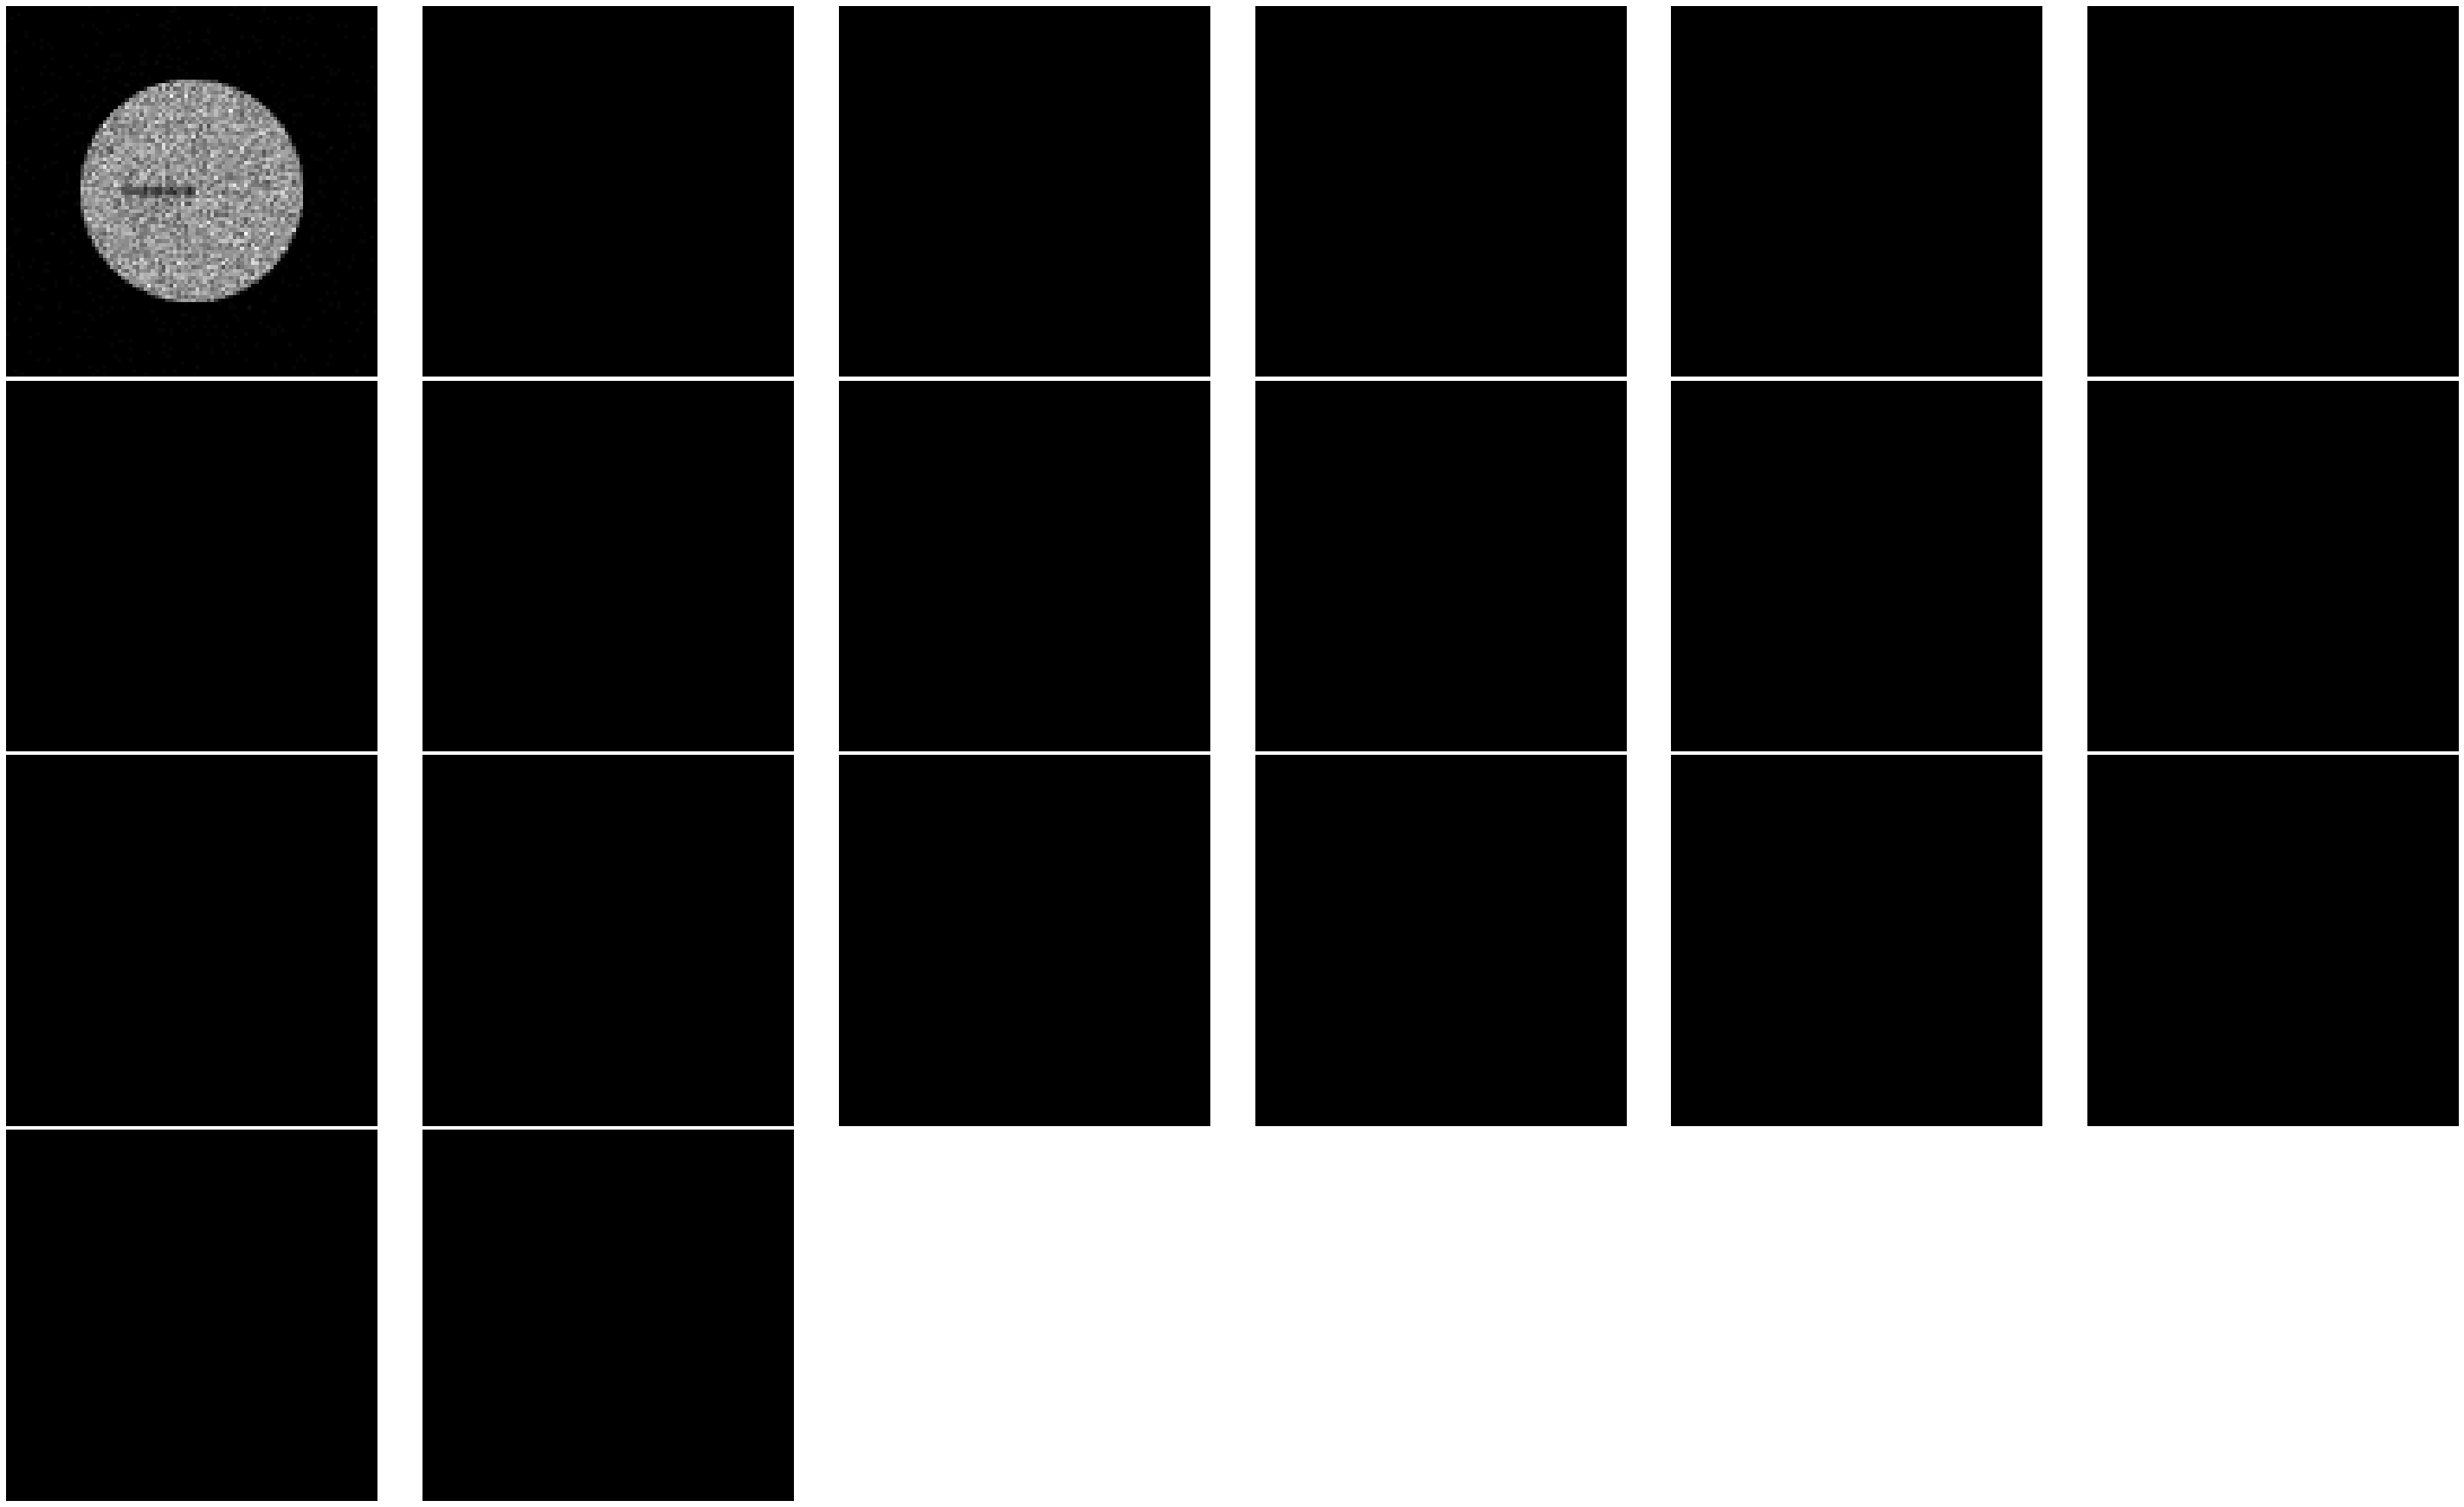

In [21]:
import SimpleITK as sitk
import matplotlib.pylab as plt
#ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("output-Dosis-Dose.mhd", sitk.sitkFloat32))
plt.figure(figsize=(40,30))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)
for i in range(ct_scans.shape[0]):
    plt.subplot(5,6,i+1), plt.imshow(ct_scans[i]), plt.axis('off')
    # use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
plt.show()